# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



### Podział pracy:

**Dominika**: Zadania 1 i 3 <br><br>
**Aleksander**: Zadania 2 i 4

In [1]:
import pandas as pd
import numpy as np

from compute_averages import *
from visualizations import *
from load_data import *

### Zadanie 1

In [5]:
all_data = load_data()

### Zadanie 2

Poniższy kod wykonuje następujące zadania:
 - Obliczanie średniego miesięcznego stężenia PM2.5 dla każdej stacjii i roku.
 - Rysowanie wykresu liniowego miesięcznych wartości stężenia PM2.5 w **2015** i 2024 roku dla Warszawy i Katowic.

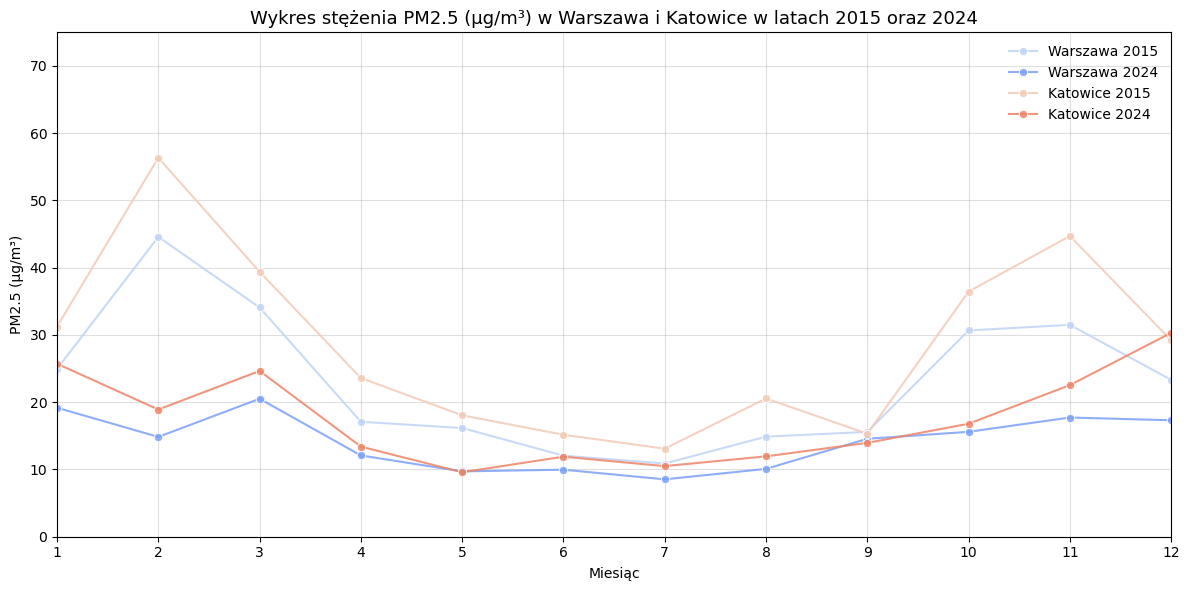

In [3]:
all_data = pd.read_csv("all_data.csv")
data = all_data.copy()
mean_df = monthly_average(data)

plot = plot_city_trends(mean_df, years=[2015, 2024])
plt.show(plot)

#### Interpretacja wyników

Zarówno w Warszawie jak i w Katowicach średnie stężnie PM2.5 spadło między rokiem 2015 a 2024. W obydwu miastach poziom drobnych zanieczyszczeń jest większy w miesiącach zimowych niż w letnich. Podczas trwania sezonu grzewczego, poziom PM2.5 w danym miesiącu jest wyższy w Katowicach niż w Warszawie; poza sezonem grzewczym, zależność ta nie zachodzi.

W roku 2024, w obydwu miastach, różnice w stężeniu drobnego pyłu pomiedzy miesiącami letnimi i zimowymi są wyraźnie mniejsze niż w 2015. Być może wynika to z usprawnień w sposobie ogrzewania i termoizolacji budynków, które zostały wprowadzone w pomiędzy tymi latami.

Co ciekawe, w roku 2015 stężenie PM2.5 w Warszawie i Katowiach jest wyraźnie niższe w grudniu niż w listopadzie. Trudno powiedzieć dlaczego tak się stało.

### Zadanie 3

#### Interpretacja powyższych obserwowanych wyników

### Zadanie 4

Poniższy kod wykonuje następujące zadania:
 - Zliczanie dni, w których została przekroczona norma PM2.5 w danej stacji pomiarowej, w danym roku.

 - Identyfikacja trzech stacji z największą oraz trzech stacji z najmniejszą liczbą takich dni w 2024 roku.

 - Rysowanie wykresu typu *grouped barplot* poziomów stężenia PM2.5 dla 6. zidentyfikowanych stacji w latach 2015, 2018, 2021 i 2024.

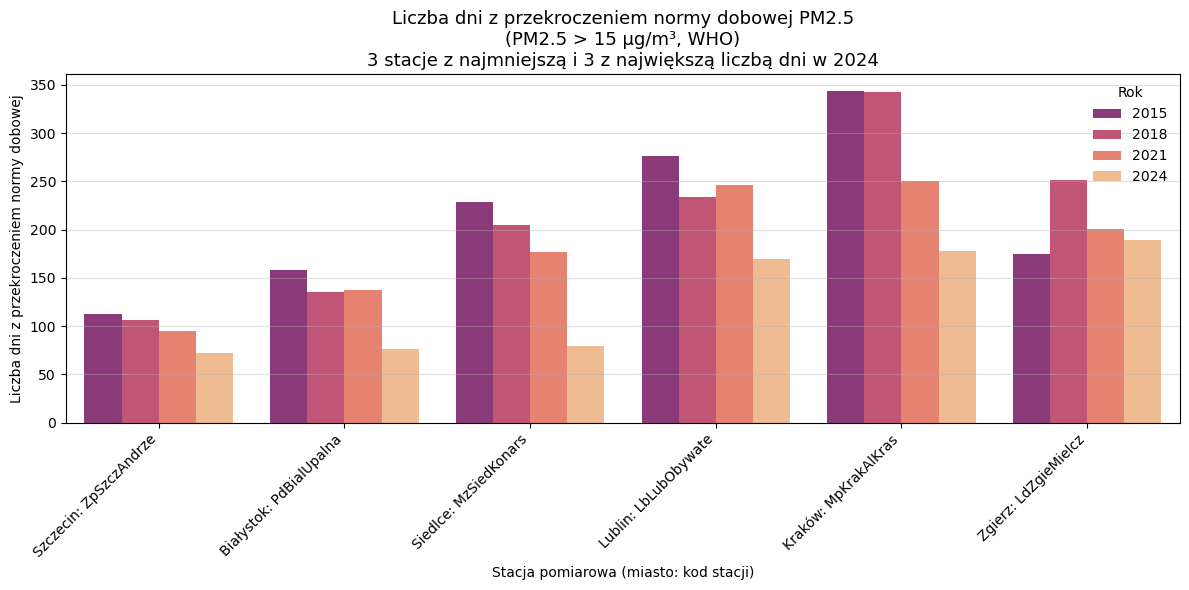

In [ ]:
all_data = pd.read_csv("all_data.csv")
data = all_data.copy()

counts = count_days_over_treshold(data)
plot = plot_pm25_exceedance_bars(counts)
plt.show(plot)

#### Interpretacja wyników

Powyższy wykres pokazuje liczbę dni, w których średnie dobowe stężenie PM2.5 przekroczyło wartość 15 µg/m³ dla sześciu wybranych stacji - trzech z najmniejszą (wykresy 1-3) i trzech z największą (wykresy 4-6) liczbą przekroczeń w 2024 r. Stacje z największą liczbą przekroczeń wykazują wyraźnie gorszą jakość powietrza w niemal wszystkich porównywanych latach, co sugeruje trwałe źródła emisji lub niekorzystne warunki meteorologiczne.

Zgodnie z tym co zauwożono w poprzednich zadaniach, stężenie PM2.5 zmierzone przez daną stację ma trend spadkowy w czasie.

### Ogólna interpretacja obserwowanych wyników

Średnie miesięczne wartości PM2.5 w latach 2015, 2018, 2021 i 2024 wykazują tendencję spadkową zanieczyszczenia powietrza w badanym okresie. Najwyższe wartości można zaobserwować w większych miastach, co może wiązać się z większym natężeniem ruchu drogowego. Dodatkowo dane wskazują na zależność stężenia PM2.5 od pory roku - wartości są najniższe w  miesiącach letnich, a wzrastają w sezonie zimowym, co prawdopodobnie wynika z ogrzewania budynków.